In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import alphabetical
import build
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Dropout
from tensorflow.keras import Model


In [56]:
df = build.load_data("output.csv")

In [57]:
#df_test = df.iloc[:100]
#df_test

In [58]:
type(df['artist_terms_weights'][0][0])

str

In [124]:
df['artist_terms'][752]

['nan']

In [60]:
def create_inputdata_ws(df):
    udf = df[['hottness', 'loudness', 'tempo']]
    aadf = df[['similar','artist_terms', 'artist_terms_weights']]
    
    # Process numerical features
    data_train_u = np.array(udf.values)

    # Process artist terms
    unique_terms = set(term for sublist in df['artist_terms'] for term in sublist)
    term_index = {term: idx for idx, term in enumerate(unique_terms)}

    data_train_aa = np.zeros((len(df), len(unique_terms)))
    
    for i, (terms, weights) in enumerate(zip(df['artist_terms'], df['artist_terms_weights'])):
        if 'nan' not in terms:
            for term, weight in zip(terms, weights):
                    weight_float = float(weight)
                    idx = term_index[term]
                    data_train_aa[i, idx] = weight_float
            
    data_train = np.concatenate((data_train_u, data_train_aa), axis=1)

    return data_train

In [61]:
data_train = create_inputdata_ws(df)
#data_train[752]

In [62]:
#Check if there is nan in data
a = [i for i in range(data_train.shape[0]) if True in np.isnan(data_train[i])]
np.set_printoptions(threshold=np.inf)
a

[]

In [63]:
nan_indices = []
for index, row in df.iterrows():
    if "NaN" in row['artist_terms_weights']:
        nan_indices.append(index)

nan_indices

[]

In [113]:
def creating_autoencoder(input_size, code_size, node_size):

    # Encoder
    encoder_input = Input((input_size,))
    encoder_nl = Dense(node_size, activation='relu')(encoder_input)
    encoder_encode = Dense(code_size, activation='relu')(encoder_nl)

    # Decoder
    decoder_nl = Dense(node_size, activation='relu')(encoder_encode)
    decoder_output = Dense(input_size)(decoder_nl)

    # Build the autoencoder model
    autoencoder = Model(encoder_input, decoder_output)
    autoencoder.compile(loss='MSE', optimizer=tf.optimizers.Adam(learning_rate=0.001))

    # Build the encoder model
    encoder = Model(encoder_input, encoder_encode)

    
    return autoencoder, encoder

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0074
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0045
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0037
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0033
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0028
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0025


Text(0, 0.5, 'loss')

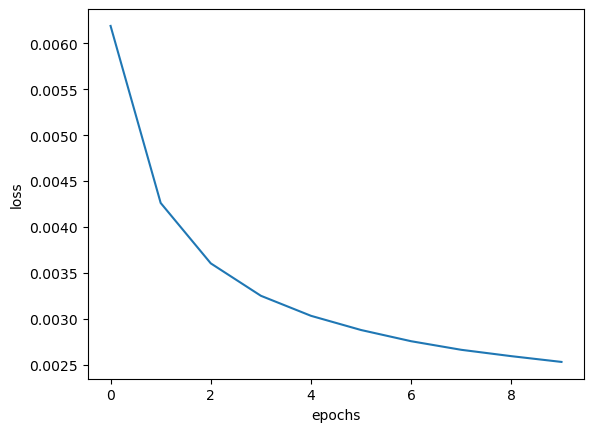

In [117]:
autoencoder, encoder = creating_autoencoder(data_train.shape[1],128, 200)
ae_history = autoencoder.fit(data_train, data_train, epochs=10)

plt.plot(ae_history.history['loss']);
plt.xlabel('epochs')
plt.ylabel('loss')

In [118]:
m = []
for j in np.random.randint(0, 10000, size=1000):
    pred = autoencoder.predict(np.array([data_train[j]]))
    #m.append(max([ pred[0][i] - data_train[j][i] for i in range(1075)]))
    m.append(np.linalg.norm(pred[0] - data_train[j]))
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


3.4457057291543225

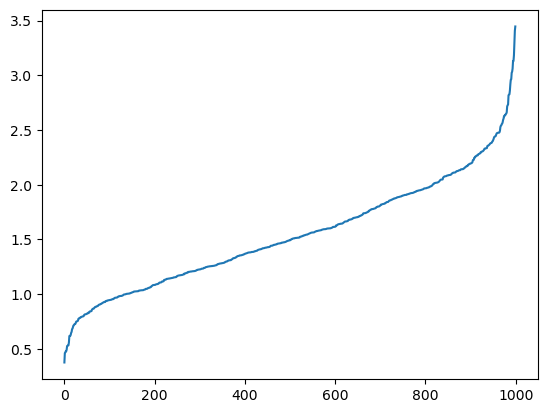

In [119]:
m.sort()
plt.plot(np.array(m))
max(m)

In [123]:
type(encoder.predict(np.array([data_train[0]]))[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


numpy.ndarray

Index(['artist_name', 'title', 'release', 'similar', 'hottness',
       'artist_terms', 'artist_terms_weights', 'loudness', 'tempo'],
      dtype='object')

In [ ]:
def distance_encoder(song1, song2, df, encoder, data):
    
    sorted_df = alphabetical.sort_dataframe(df)
    alpha_dict = alphabetical.get_alpha_dict(sorted_df)

    idx1, idx2 = alphabetical.get_index_song(song1[1],song1[0], sorted_df, alpha_dict), alphabetical.get_index_song(song2[1],song2[0], sorted_df, alpha_dict)
    hsong1, hsong2 = data[idx1], data[idx2]
    
    encoded_song1, encoded_song2 = encoder.predict(np.array([hsong1, hsong2]))
    
    return np.linalg.norm(encoded_song1-encoded_song2)
    